***

# Plots for feed zone interpretation from spinner ratio analysis
#### Joel Trent
***

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Import the functions for use by replacing the path below with the path to the Python file

In [6]:
import sys  
# sys.path.insert(1, "C:/.../WellAnalysisFunctions") # replace with path to WellAnalysisFunctions
sys.path.insert(1, "C:Users/TrentJ/Documents/Git/SpinnerRatioAnalysis/WellAnalysisFunctions")
from WellAnalysisFunctions import *

### Import excel file with all spinner and temperature profiles

In [7]:
# import data
dfs = pd.read_excel('Well_data_input.xlsx', sheet_name=None)

spin1 = dfs['INJ1-spinner']
spin2 = dfs['INJ2-spinner']

index = dfs['Index']

In [8]:
index['label'] = [str(index['Flow rate tph'][i]) + ' t/h - ' +  str(index['Test type'][i])
                  for i in range(0, index['ID'].shape[0])]
index

,ID,Test type,Flow rate tph,Spinner Analysis Type,label
0,INJ1,Stage,180,Linear,180 t/h - Stage
1,INJ2,Stage,210,Linear,210 t/h - Stage


In [9]:
# well completion information
production_shoe = 1415.23       # depth to casing shoe (mCHF)
top_of_liner = 1280.            # top of perforated liner (mCHF)
bottom_of_liner = 2801.74       # bottom of perforated liner (mCHF)
terminal_depth = 2847.14          # deepest drilled depth, or maximum clear depth (mCHF)

top_of_plot = 1100            # specify top of plotting depth, so the entire casing does not show up
bottom_of_plot = 2850         # specify bottom of plot as well

### Compute spinner ratios after offset and interpolation

#### Stage Test

Best depth offset is:  [-2.]


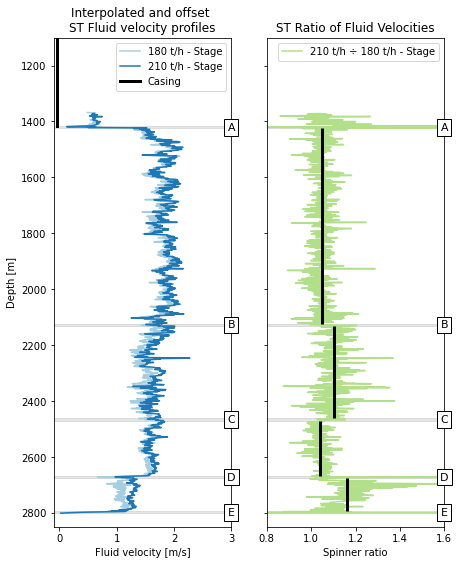

In [10]:
spin1_fluidvel, [spin2_fluidvel], best_offsets = compute_spinner_interpolations_and_offsets(
                                                            spin1, [spin2], 
                                                            search_range=[-7,2], 
                                                            step_size=0.2)

print("Best depth offset is: ", best_offsets)


[ratio_21] = compute_ratio_dfs([spin1_fluidvel, spin2_fluidvel])

fig, ax = plot_fluidvel_and_ratio([spin1_fluidvel, spin2_fluidvel], [ratio_21],
                                 xlims_fluidvel = [-0.1,3],
                                 xlims_ratio = [0.8, 1.6],
                                 ylims = [bottom_of_plot, top_of_plot],
                                 labels=[np.array(index['label'][0:2]), ['210 t/h ÷ 180 t/h - Stage']],
                                 xlabels = ['Fluid velocity [m/s]', 'Spinner ratio'],
                                 subtitles=['Interpolated and offset \nST Fluid velocity profiles', 
                                            'ST Ratio of Fluid Velocities'])

add_casing_to_plot(ax, production_shoe, top_of_liner, terminal_depth, include_liner=False)

feedzones_stage = [[1418, 1424],
                   [2125, 2130],
                   [2462, 2472],
                   [2668, 2675],
                   [2795, 2802]]

add_feedzones_to_plot(ax, feedzones_stage)
add_feedzone_labels_to_plot(ax, feedzones_stage, ["A", "B", "C", "D", "E"])

add_ratio_to_plot(ax, ratio_21, 1424, 2125)
add_ratio_to_plot(ax, ratio_21, 2130, 2462)
add_ratio_to_plot(ax, ratio_21, 2472, 2668)
add_ratio_to_plot(ax, ratio_21, 2675, 2795)

***
© 2024 [Joel Trent](https://nz.linkedin.com/in/joeltrent)

Plot creation based on work by:

© 2021 [Irene Wallis](https://www.cubicearth.nz/) and [Katie McLean](https://www.linkedin.com/in/katie-mclean-25994315/) 

Licensed under the Apache License, Version 2.0

***